# Decision Trees Exercise
In this exercise you will show that ID3 is sub-optimal. Implement a simple version of Decision Tree, and will then apply a Decision Tree classsifier on the MNIST hand written digits dataset that we already saw.


## Suboptimality of ID3
Consider the following training set, where $\mathcal{X} = \{0, 1\}^3$ and $\mathcal{Y} =\{0, 1\}$:

$$
\begin{aligned}
((1, 1, 1), 1)\\
((1, 0, 0), 1)\\
((1, 1, 0), 0)\\
((0, 0, 1), 0)
\end{aligned}
$$

Suppose we wish to use this training set in order to build a decision tree of depth 2 (i.e. for each
input we are allowed to ask two questions of the form "$x_i = 0$?" before deciding on the label).

1. Suppose we run the ID3 algorithm up to depth 2 (namely, we pick the root node and its
children according to the algorithm, but instead of keeping on with the recursion, we stop
and pick leaves according to the majority label in each subtree, once we reach depth 2). 
Assume that the subroutine used to measure the quality of each feature is based on the information gain, and that if two features get the same score, one of them is picked arbitrarily. 
Show that the training error of the resulting decision tree is at least 1/4.
2. Find a decision tree of depth 2, which attains zero training error.


#### Answer
#### 1)
Let's calculate the information gains for each column (feature):

feature 1:<br>
$H(\frac{1}{2})-((\frac{3}{4})H(\frac{2}{3})+\frac{1}{4}H(0))\approx 0.32$
<br><br>

In [1]:
import math
-1*(1/2*math.log2(1/2)+1/2*math.log2(1/2))-(-3/4*(2/3*math.log2(2/3)+1/3*math.log2(1/3)) -1/4*(1*math.log2(1)))

0.31127812445913283

features 2 and 3:<br>
$H(\frac{1}{2})-((\frac{1}{2})H(\frac{1}{2})+\frac{1}{2}H(\frac{1}{2}))=0$
<br><br>

In [2]:
-1*(1/2*math.log2(1/2)+1/2*math.log2(1/2))-(2/4*(-1/2*math.log2(1/2)-2/4*math.log2(1/2))+2/4*(-1/2*math.log2(1/2)-2/4*math.log2(1/2)))

0.0

Since feature 1 has highest info gain the algorithm sets it as the root node. Which leaves us with 3 samples <br>
((1, 1, 1), 1) , ((1, 0, 0), 1) , ((1, 1, 0), 0))  in one node. We won't be able to distinguish them by the remaining 3 features in one question. Therefore at least one sample  will be labeled wrong. We have 4 samples, so the training error is at least 1/4.
#### 2)
The answer is provided plot of the code below. It's an example tree of multiple possible answers. We can see that we have four leaves with one sample in each leafe using depth =2.  Since we have one sample per each leaf => we have determenistic solution for each sample using only two questions. Hence, no uncertainty => no error.

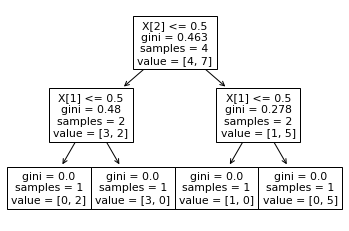

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# import graphviz
# !pip install graphviz
dt = DecisionTreeClassifier(max_depth=2,random_state=None)
X = [[1, 1, 1], [1, 0, 0], [1, 1, 0], [0, 0, 1]]
Y= [1,1,0,0]
# dt.fit(X,Y,sample_weight=[4,2,3,1])
dt.fit(X,Y,sample_weight=[5,2,3,1])
# dot_data = tree.export_graphviz(dt, out_file=None, max_depth=2)
# graphviz.Source(dot_data)
tree.plot_tree(dt);

## Implementing Decision Tree From Scratch
In this exercise you will need to implement a simple version of Decision Tree from scratch. Your decision tree will handle **continuous input and output** (this should actually work also for binary input attributes).

* Compelete the skeleton class below
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `min_leaf` is the minimal number of samples in each leaf node
  
* For splitting criterion, use either **"Train Squared Error Minimization (Reduction in Variance)"** or **"Train Absolute Error Minimization"** (choose one). Whatever you choose, make sure you implement the splitting point decision efficiently (in $O(nlgn)$ time).

* The `predict` function will use mean of the target values in the leaf node matching each row of the given `X`. The result is a vector of predictions matching the number of rows in `X`.

* To check your decision tree implementation, use the boston dataset (`from sklearn.datasets import load_boston`) split the data set into train and test using (`from sklearn.model_selection import train_test_split`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
    for min_leaf in [1,5,10,100]:
      dt = DecisionTree(X, y, n, sz, min_leaf)
      mse = # mean square error over test set
      print("min_leaf:{0} --- oob mse: {1}".format(min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = dt.predict(X_train)  # forest is the chosen model
  plt.scatter(y_hat, y_test)
  ```

In [4]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# X, y = load_boston(return_X_y=True)
# x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.25)

In [5]:
x_train.shape[0],x_train.shape[1]

(379, 13)

In [ ]:
def std_agg(cnt, s1, s2): 
    return math.sqrt((s2/cnt) - (s1/cnt)**2)

class DecisionTree():
#     def __init__(self, X, y, n_trees, sample_sz, min_leaf):
    def __init__(self, x, y, idxs,depth=10, min_leaf=5):
        self.x, self.y, self.idxs, self.min_leaf= x, y, idxs, min_leaf
        self.depth = depth
        self.n, self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])
    
    def predict_row(self, xi):
        if self.is_leaf: 
            return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

    def find_varsplit(self):
            for i in range(self.x.shape[1]): 
                self.find_better_split(i)
            if self.is_leaf: 
                return
            x = self.split_col
            lhs = np.nonzero(x<=self.split)[0]
            rhs = np.nonzero(x>self.split)[0]
            self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs], depth=self.depth-1, min_leaf=self.min_leaf)
            self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs], depth=self.depth-1, min_leaf=self.min_leaf)

    def find_better_split(self, var_idx):
        x, y = self.x[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi
    


    @property
    def split_name(self): return self.x.columns[self.var_idx]

    @property
    def split_col(self): return self.x[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf') or self.depth <= 0 

In [7]:
from sklearn.metrics import mean_squared_error

for min_leaf in [1,5,10,100]:
    dt = DecisionTree(x_train, y_train, np.array(range(x_train.shape[0])), min_leaf)
    y_pred = dt.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print("min_leaf:{0} --- oob mse: {1}".format(min_leaf, mse))

min_leaf:1 --- oob mse: 59.53819502735702
min_leaf:5 --- oob mse: 24.388403529948658
min_leaf:10 --- oob mse: 24.028467357850314
min_leaf:100 --- oob mse: 24.028467357850314


#### Answer
We can see the minimal mse is for min_leaf = 5 

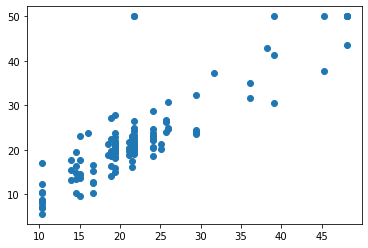

In [8]:
min_leaf = 5
dt = DecisionTree(x_train, y_train,  np.array(range(x_train.shape[0])), min_leaf)
y_hat = dt.predict(x_test)  
plt.scatter(y_hat, y_test)

## Using Decision Tree for Digits Classification
Remeber the MNIST dataset used - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).
- Choose which model parameters you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.
  - You can use `sklearn.tree.DecisionTreeClassifier`
- Once you are satisfied with the model parameters, plot the importance of each of the pixels to the final decision.
- Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
- Discuss your results.

In [9]:
# code and answer go here
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

%matplotlib inline
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
# plt.imshow(mnist.images[0]);
# mnist['data'].shape, mnist['feature_names'], mnist['target_names']

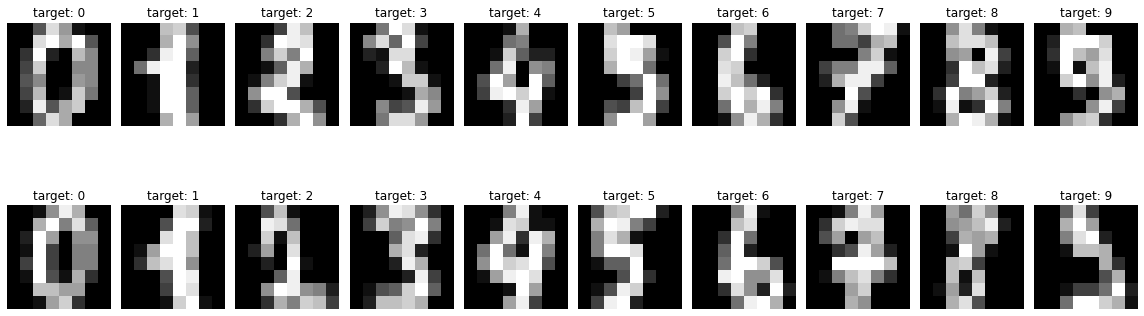

In [11]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

## RandomForestClassifier:

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def acc(y_true : np.ndarray, y_pred : np.ndarray) -> float:
    return round(accuracy_score(y_true, y_pred) * 100, 2)

Xtrain, Xtest, ytrain, ytest = train_test_split(mnist.data, mnist.target, test_size=1/7)


# print(metrics.classification_report(ypred, ytest))

# mat = confusion_matrix(ytest, ypred)
# sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
# plt.xlabel('true label')
# plt.ylabel('predicted label');

for max_depth in [1,5,10,100]:
    RF_model = RandomForestClassifier(max_depth = max_depth)
    RF_model.fit(Xtrain, ytrain)
    test_pred = RF_model.predict(Xtest)
    mse = mean_squared_error(ytest, test_pred)
    print("max_depth:{0} --- mse: {1}".format(max_depth, mse))

max_depth:1 --- mse: 4.680933852140078
max_depth:5 --- mse: 2.124513618677043
max_depth:10 --- mse: 0.5175097276264592
max_depth:100 --- mse: 0.603112840466926


#### Answer
After running the loop multiple times we can see the minimal mse is sometimes at max_depth = 10 and sometimes at max_depth = 100. But it's not significantly different. So we can take the lower value for depth => max_depth = 10 because it's less complex to build such tree. Therefore we'll use max_depth = 10 for the plots below.

Training accuracy: 100.0%
Validation accuracy: 97.28%
RandomForest - Probability for correctly classified examples in test data: 0.9727626459143969
RandomForest - Probability for  misClassified examples in test data: 0.027237354085603113


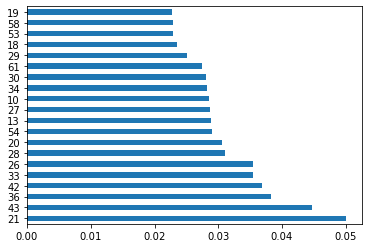

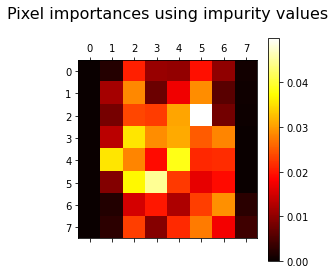

In [13]:
RF_model = RandomForestClassifier(max_depth = 10)
RF_model.fit(Xtrain, ytrain)
train_pred = RF_model.predict(Xtrain)
test_pred = RF_model.predict(Xtest)

acc_train = acc(train_pred, ytrain)
acc_val = acc(test_pred, ytest)
print(f'Training accuracy: {acc_train}%')
print(f'Validation accuracy: {acc_val}%')

feat_importances = pd.Series(RF_model.feature_importances_)
feat_importances.nlargest(20).plot(kind='barh')
# plt.show()

img_shape = mnist.images[0].shape
imp_reshaped = RF_model.feature_importances_.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values",size=16, y=1.2)
plt.colorbar()
# plt.show()

prob_correct = Xtest[test_pred== ytest].shape[0]/Xtest.shape[0]
prob_incorrect = Xtest[test_pred!= ytest].shape[0]/Xtest.shape[0]
print(f'RandomForest - Probability for correctly classified examples in test data: {prob_correct}')
print(f'RandomForest - Probability for  misClassified examples in test data: {prob_incorrect}')

## DecisionTreeClassifier:

In [14]:
for max_depth in [1,5,10,100]:
    DT_clf = DecisionTreeClassifier(max_depth = max_depth)
    DT_clf.fit(Xtrain, ytrain)
    test_pred = DT_clf.predict(Xtest)
    mse = mean_squared_error(ytest, test_pred)
    print("max_depth:{0} --- mse: {1}".format(max_depth, mse))

max_depth:1 --- mse: 7.891050583657588
max_depth:5 --- mse: 10.284046692607005
max_depth:10 --- mse: 3.9105058365758754
max_depth:100 --- mse: 4.416342412451362


#### Answer
After running the loop multiple times we can see the minimal mse is sometimes at max_depth = 10 and sometimes at max_depth = 100. But it's not significantly different. So we can take the lower value for depth => max_depth = 10 because it's less complex to build such tree. Therefore we'll use max_depth = 10 for the plots below.

Training accuracy: 97.27%
Validation accuracy: 82.1%


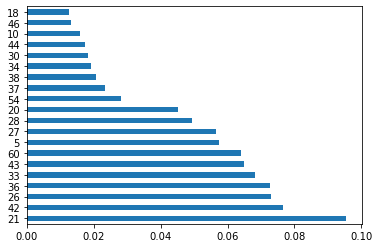

DecisionTRee - Probability for correctly classified examples in test data: 0.8210116731517509
DecisionTRee - Probability for  misClassified examples in test data: 0.17898832684824903


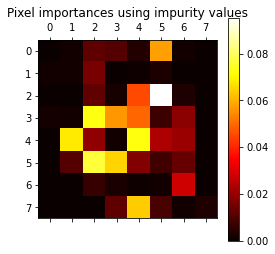

In [15]:
DT_clf = DecisionTreeClassifier(max_depth=10)
DT_clf.fit(Xtrain, ytrain)
train_pred= DT_clf.predict(Xtrain)
test_pred= DT_clf.predict(Xtest)
acc_train = acc(train_pred, ytrain)
acc_val = acc(test_pred, ytest)
print(f'Training accuracy: {acc_train}%')
print(f'Validation accuracy: {acc_val}%')

# print(metrics.classification_report(test_pred, ytest))

feat_importances = pd.Series(DT_clf.feature_importances_)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

img_shape = mnist.images[0].shape
imp_reshaped = DT_clf.feature_importances_.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
# plt.show()

prob_correct = Xtest[test_pred== ytest].shape[0]/Xtest.shape[0]
prob_incorrect = Xtest[test_pred!= ytest].shape[0]/Xtest.shape[0]
print(f'DecisionTRee - Probability for correctly classified examples in test data: {prob_correct}')
print(f'DecisionTRee - Probability for  misClassified examples in test data: {prob_incorrect}')

### Summary
We see that RandomForestClassifier yields significantly more acurate results than DecisionTReeClassifier. It was expected because RF algorithm executes bootstraping, i.e., combining the results of multiple Decision Trees and optimizes them.